# Iris Dataset - Multi Class Classification

In [1]:
%%html
<img src='img/iris.png', width=300, height=300>

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for the setosa class)
   4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 
      Transactions on Information Theory, May 1972, 431-433.
      -- Results:
         -- very low misclassification rates again
   5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II
      conceptual clustering system finds 3 classes in the data.

4. Relevant Information:
   --- This is perhaps the best known database to be found in the pattern
       recognition literature.  Fisher's paper is a classic in the field
       and is referenced frequently to this day.  (See Duda & Hart, for
       example.)  The data set contains 3 classes of 50 instances each,
       where each class refers to a type of iris plant.  One class is
       linearly separable from the other 2; the latter are NOT linearly
       separable from each other.
   --- Predicted attribute: class of iris plant.
   --- This is an exceedingly simple domain.
   --- This data differs from the data presented in Fishers article
	(identified by Steve Chadwick,  spchadwick@espeedaz.net )
	The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa"
	where the error is in the fourth feature.
	The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa"
	where the errors are in the second and third features.  

5. Number of Instances: 150 (50 in each of three classes)

6. Number of Attributes: 4 numeric, predictive attributes and the class

7. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

8. Missing Attribute Values: None

Summary Statistics:
	         Min  Max   Mean    SD   Class Correlation
   sepal length: 4.3  7.9   5.84  0.83    0.7826   
    sepal width: 2.0  4.4   3.05  0.43   -0.4194
   petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)
    petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)

9. Class Distribution: 33.3% for each of 3 classes.

## Method Used:
generally, most iris dataset problems will be solved by k-means, decision tree, random forest, naive bayes methods, but here we will solve them with DEEP NEURAL NETWORK using the layers api of tensorflow! This method will out perform all the other techniques for sure! we can use Neural Network for almost any problems and makes our life easier!! 

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
sbn.set_style("darkgrid")

In [3]:
iris_dataset = pd.read_csv('iris.csv', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
iris_dataset.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


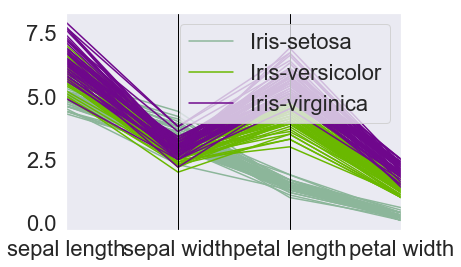

In [4]:
sbn.set(font_scale=2.0)
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris_dataset, 'species')

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


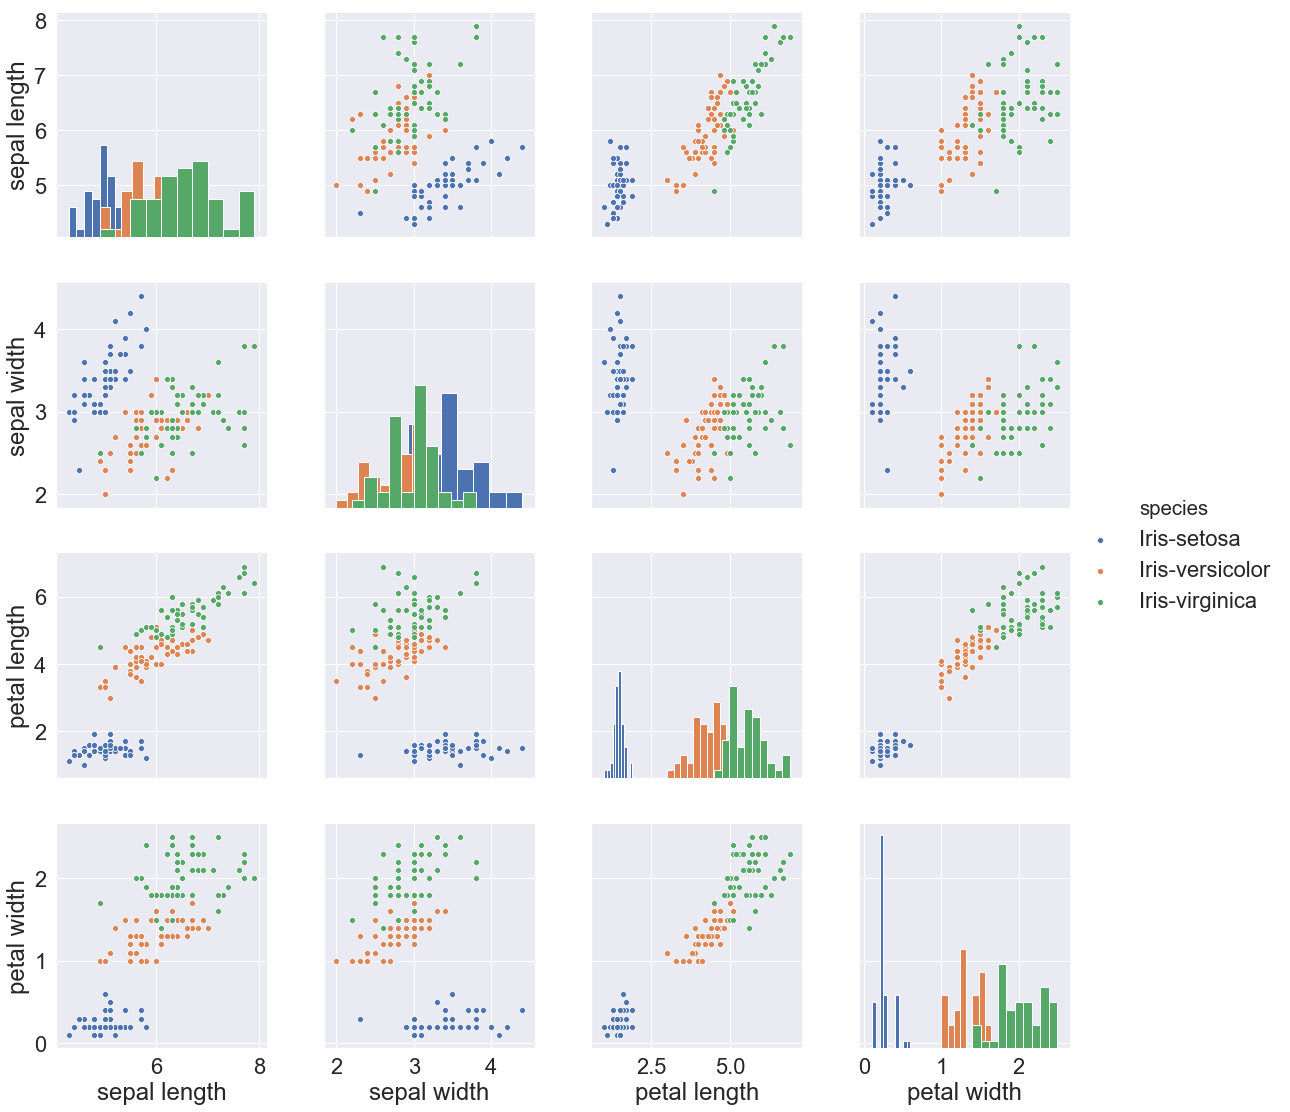

In [5]:
sbn.pairplot(iris_dataset, hue='species', size=4, diag_kind='hist')

In [6]:
iris_dataset.shape

(150, 5)

In [7]:
iris_dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  after removing the cwd from sys.path.


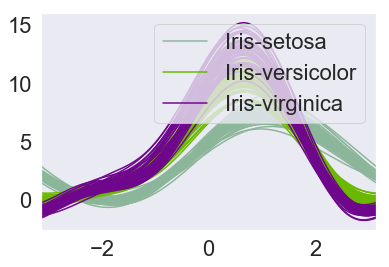

In [8]:
# additional cool data visualization
sbn.set(font_scale=2.0)
from pandas.tools.plotting import andrews_curves
andrews_curves(iris_dataset, 'species')

In [9]:
iris_dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_dataset.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

In [11]:
x = iris_dataset.drop('species', axis=1)
y = pd.DataFrame(data=iris_dataset['species'])

In [12]:
y.shape

(150, 1)

In [13]:
x.head();
y.head();

In [14]:
y.columns

Index(['species'], dtype='object')

In [15]:
y['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [16]:
labels = y['species']

In [17]:
one_hot_labels = pd.get_dummies(labels)

In [18]:
one_hot_labels

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, one_hot_labels, test_size=0.3, random_state=101)

In [21]:
y_test

,Iris-setosa,Iris-versicolor,Iris-virginica
33,1,0,0
16,1,0,0
43,1,0,0
129,0,0,1
50,0,1,0
123,0,0,1
68,0,1,0
53,0,1,0
146,0,0,1
1,1,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## layers API

In [24]:
num_feat = 4
num_hidden1 = 10
num_hidden2 = 10
num_output = 3
alpha = 0.01

In [25]:
from tensorflow.contrib.layers import fully_connected

In [26]:
x = tf.placeholder(tf.float32, shape=[None,num_feat])

In [27]:
y = tf.placeholder(tf.float32, shape=[None,3])

In [28]:
activ_fn = tf.nn.relu

In [29]:
hidden1 = fully_connected(x, num_hidden1, activation_fn=activ_fn)

In [30]:
hidden2 = fully_connected(hidden1, num_hidden2, activation_fn=activ_fn)

In [31]:
outputs = fully_connected(hidden2, num_output)

In [32]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=y, logits=outputs)

In [33]:
optimizer = tf.train.AdamOptimizer(alpha)
train = optimizer.minimize(loss)

In [34]:
init = tf.global_variables_initializer()

In [35]:
steps = 5500
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        sess.run(train,feed_dict={x:scaled_x_train,y:y_train})
        
    logits = outputs.eval(feed_dict={x:scaled_x_test})
    ytest = tf.argmax(y_test,axis=1)
    preds = tf.argmax(logits,axis=1) 
    equall = tf.equal(ytest,preds)
    acc = tf.reduce_mean(tf.cast(equall, tf.float32))
    results = preds.eval()
    print('Accuracy: {}'.format(sess.run(acc, feed_dict={x:scaled_x_test, y:y_test})))

Accuracy: 0.9777777791023254


In [36]:
print(results)

[0 0 0 2 1 2 1 1 2 0 2 0 0 2 2 1 1 1 0 2 1 0 1 1 1 1 1 2 0 0 2 1 2 1 2 1 1
 1 1 2 0 0 0 2 1]


In [37]:
results1 = pd.get_dummies(results).as_matrix() # changing results to one hot for classification report , confusion matrixx
print(results1)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [38]:
type(y_test)

pandas.core.frame.DataFrame

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(results1, y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.95      1.00      0.97        19
          2       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        45



In [40]:
c = confusion_matrix(y_test.values.argmax(axis=1), results1.argmax(axis=1))
c

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  0, 12]], dtype=int64)